# Analysis and Data Visualization

## Library

In [5]:
# Loading in data:
import numpy as np
import pandas as pd
#import feather

# Plotting:
import matplotlib
from plotnine import *
import seaborn as sns
from scipy import stats
from mizani.breaks import date_breaks
from mizani.formatters import date_format
import plotnine as p9
from matplotlib.animation import FuncAnimation
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')



# Maps:
import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
import geopandas as gpd
import shapely.geometry as geom
from matplotlib.collections import PatchCollection
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
import folium
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

#Animated Bar Plot
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


## Covid-19 Death Counts by Racial Groups

In [6]:
death = pd.read_csv('covid19_death.csv')
demo = ['non_hispanic_white',
'non_hispanic_black_african_american',
'non_hispanic_american_indian_alaska_native',
'non_hispanic_asian_pacific_islander',
'nh_nhopi',
'non_hispanic_more_than_one_race',
'hispanic_latino_total']



In [7]:
state=death.groupby('state')['non_hispanic_white',
'non_hispanic_black_african_american',
'non_hispanic_american_indian_alaska_native',
'non_hispanic_asian_pacific_islander',
'nh_nhopi',
'non_hispanic_more_than_one_race',
'hispanic_latino_total'].sum()



<ipython-input-7-b0cb0368f623>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Total Covid-19 Death 

''

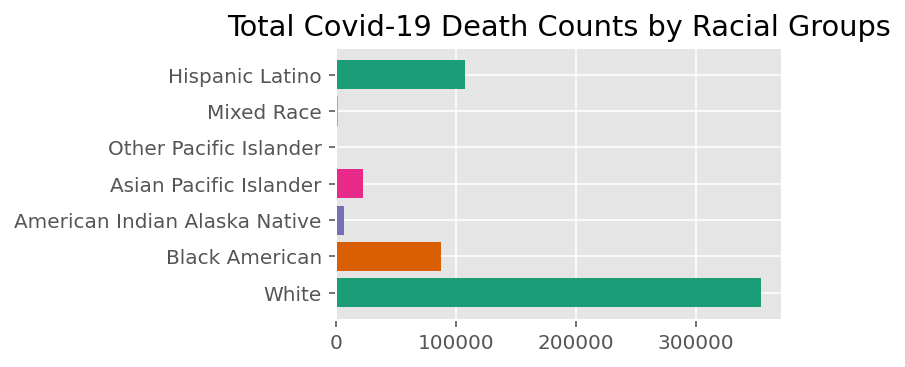

In [8]:
df = pd.read_csv('covid19_death.csv', index_col='start_week', parse_dates=['start_week'])
df = df.loc[(df['group'] == 'By Total') & (df['state'] == "United States")]
df = df[[
    "non_hispanic_white", 
         "non_hispanic_black_african_american",
        "non_hispanic_american_indian_alaska_native",
        "non_hispanic_asian_pacific_islander",
        "nh_nhopi",
        "non_hispanic_more_than_one_race",
        "hispanic_latino_total"]]
df.columns = [ "White", 
         "Black American",
        "American Indian Alaska Native",
        "Asian Pacific Islander",
        "Other Pacific Islander",
        "Mixed Race",
        "Hispanic Latino"]
s = df.loc['2020-01-01']
s

fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors)
plt.title('Total Covid-19 Death Counts by Racial Groups')
;

### Animated Run Bar Plot 

In [10]:
df = pd.read_csv('covid19_death.csv', index_col='start_week', parse_dates=['start_week'])
month = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0]
df = df.loc[(df['group'] == 'By Month') & (df['state'] == "United States") & (df["month"].isin(month))]
df = df[[
    "non_hispanic_white", 
         "non_hispanic_black_african_american",
        "non_hispanic_american_indian_alaska_native",
        "non_hispanic_asian_pacific_islander",
        "nh_nhopi",
        "non_hispanic_more_than_one_race",
        "hispanic_latino_total"]]
df.columns = [ "White", 
         "Black American",
        "American Indian Alaska Native",
        "Asian Pacific Islander",
        "Other Pacific Islander",
        "Mixed Race",
        "Hispanic Latino"]


In [11]:
s = df.loc['2020-01-01':'2021-05-01']
s = s.reset_index()
s.index = s.index * 5
last_idx = s.index[-1] + 1
df_expanded = s.reindex(range(last_idx))
df_expanded['start_week'] = df_expanded['start_week'].fillna(method='ffill')
df_expanded = df_expanded.set_index('start_week')
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_expanded = df_expanded.interpolate()
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded


def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['start_week'] = df_expanded['start_week'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('start_week')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

labels = df_expanded.columns

In [12]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Racial Groups - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

anim.save('covid_death.mp4')
html = anim.to_html5_video()
HTML(html)



## Covid-19 Death By States

In [13]:
df_state = pd.read_csv('covid19_states_death.csv')
df_state_death = df_state[["submission_date","state", "tot_death"]]
df_tot = df_state_death.loc[df_state_death.groupby('state')['tot_death'].idxmax()]
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
df_tot

,submission_date,state,tot_death
8955,2021-06-01T00:00:00.000,AK,362
22214,2021-06-05T00:00:00.000,AL,11215
19468,2021-06-05T00:00:00.000,AR,5846
8823,2021-03-29T00:00:00.000,AS,0
5841,2021-06-05T00:00:00.000,AZ,17698
27030,2021-06-05T00:00:00.000,CA,62242
14538,2021-06-05T00:00:00.000,CO,6613
5781,2021-06-02T00:00:00.000,CT,8247
23885,2021-06-04T00:00:00.000,DC,1136
26934,2021-06-05T00:00:00.000,DE,1677


### Interactive Choropleth Map for Total Death Case from Covid-19

In [17]:
fig = px.choropleth(df_tot,
                    locations='state',
                    color='tot_death',
                    color_continuous_scale='spectral_r',
                    hover_name='state',
                    locationmode='USA-states',
                    labels={'tot_death':'Total Death Count'},
                    scope='usa')
fig.add_scattergeo(
    locations=df_tot['state'],
    locationmode='USA-states',
    text=df_tot['state'],
    mode='text')

fig.update_layout(
    title={'text':'Covid-19 Death Count by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()


## Vaccination Allocation Based on Racial Groups

In [ ]:
vaccine = pd.read_csv('covid_vaccine.csv', index_col='date', parse_dates=['date'])

vaccine['demographic_category'] = vaccine['demographic_category'].replace({'Race_eth_Hispanic':'Hispanic/Latino',
                                                 'Race_eth_NHWhite':'White',
                                                'Race_eth_NHAIAN':'American Indian/Alaska Native',
                                                'Race_eth_NHAsian':'Asian',
                                                'Race_eth_NHBlack':'Black',
                                                'Race_eth_NHNHOPI':'Native Hawaiian/Other Pacific Islander',
                                                'Race_eth_NHMult_Oth':'Other race or multi-racial',
                                                'Race_eth_unknown':'Unknown',
                                                'Race_eth_known':'Known'})



vac_aggr = pd.merge(group_by(vaccine, 'demographic_category','administered_dose1'), group_by(vaccine, 'demographic_category','series_complete_yes'), on="demographic_category")
vac_aggr

vac_aggr.plot(x="demographic_category", y=["administered_dose1", "series_complete_yes"], kind="bar",figsize=(9,8))
plt.title(label='Numbers of People Vaccinated for Covid-19 by Racial Group', 
          fontweight=20, 
          pad='2.0',
         fontsize=20, 
          ha='center',
         y=1.08)
plt.xlabel('Racial Groups', fontsize=20)
plt.ylabel('Counts (10,000 people)', fontsize=20)
plt.xticks(rotation=60)
plt.tick_params(colors='black', which='both')
plt.legend(['Dose 1', 'Complete Series'], title = 'Number of Dosage', fancybox=True)
plt.savefig('covid_vac.png')
vac_aggr



In [ ]:
vaccine

## Burden of Covid-19 on Mental Health

In [ ]:
mental = pd.read_csv('covid19_mental_illness.csv', index_col='time_period_start_date', parse_dates=['time_period_start_date'])


#Renamed the Values within the subgroup column for easier manipulation.
mental['subgroup'] = mental['subgroup'].replace({'Non-Hispanic White, single race':'White',
                                                 'Non-Hispanic Black, single race':'Black',
                                                'Non-Hispanic Asian, single race':'Asian',
                                                'Non-Hispanic, other races and multiple races':'Other Races and Mixed Races'})

mental

def group_by(df,col1,col2):
    return df.groupby(col1 , as_index = False)[col2].sum()





x = group_by(mental, "subgroup", "value")

mental['subgroup'].value_counts()

x['value'] = x['value'].div(33).round(2)
x

x.plot(x="subgroup", y="value", kind="bar",figsize=(9,8), color=['orange', 'red', 'white', 'blue', 'cyan'], legend=None)
plt.title(label='Overall Average of People reported Feeling Depressed or Anxious based on Racial Groups', 
          fontweight=20, 
          pad='2.0',
         fontsize=20, 
          ha='center',
         y=1.08)
plt.xlabel('Racial Groups', fontsize=20)
plt.ylabel('Average Percentages', fontsize=20)
plt.xticks(rotation=60)
plt.tick_params(colors='black', which='both')
plt.savefig('covid_MI.png')



In [ ]:
treatment = pd.read_csv('mental_health_treatment.csv')
mental = pd.read_csv('covid19_mental_illness.csv')
vaccine = pd.read_csv('covid_vaccine.csv')
